In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-digit-recognition/data.csv


In [2]:
import pandas as pd
import numpy as np
import os

# List the files in the current directory to confirm
print(os.listdir('/kaggle/input'))


data = pd.read_csv('/kaggle/input/handwritten-digit-recognition/data.csv')

df = pd.DataFrame(data)
print(df.head())
df.shape

['handwritten-digit-recognition']
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel78

(42000, 785)

In [3]:
y=df['label']
x=df.drop('label',axis=1)

6


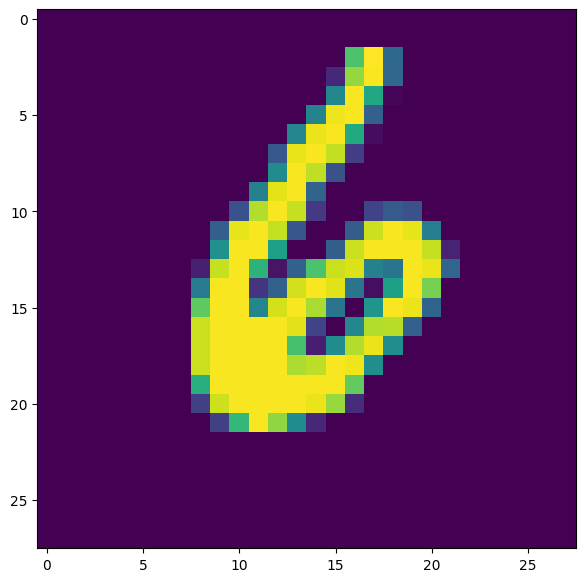

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

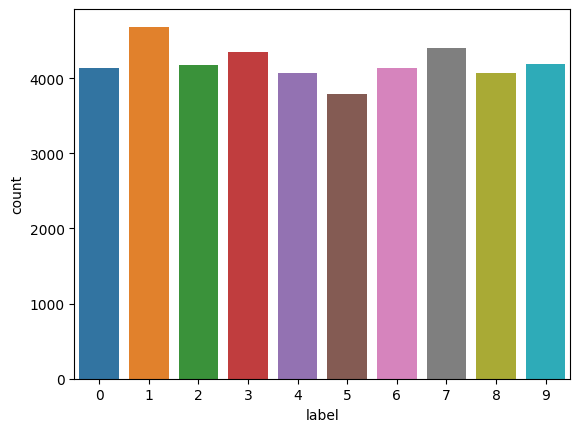

In [5]:
import seaborn as sns

sns.countplot( x='label', data=df) 

In [6]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.9636507936507936


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.96      1.00      0.98      1370
           2       0.98      0.96      0.97      1252
           3       0.95      0.96      0.95      1369
           4       0.97      0.96      0.97      1215
           5       0.95      0.95      0.95      1132
           6       0.97      0.99      0.98      1216
           7       0.96      0.96      0.96      1326
           8       0.98      0.92      0.95      1197
           9       0.94      0.94      0.94      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [11]:
print(confusion_matrix(y_test, y_pred))

[[1224    0    2    0    0    1    6    0    1    2]
 [   0 1364    0    0    0    0    2    2    1    1]
 [   5   10 1204    6    1    1    2   18    2    3]
 [   3    4    6 1315    0   22    1    7    9    2]
 [   2   12    1    0 1165    0    5    1    0   29]
 [   3    1    1   27    2 1075   16    0    2    5]
 [  10    1    0    0    1    3 1201    0    0    0]
 [   1   17    5    0    0    0    0 1278    1   24]
 [   5    8    7   25   11   21    2    4 1102   12]
 [   7    5    1   12   18    6    0   21    3 1214]]
